<a href="https://colab.research.google.com/github/Anshigupta/ml-projects-/blob/main/HeartDisease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Heart Disease Prediction.***

 **Description**
 
age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)


In [120]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [121]:
heart_df = pd.read_csv('heart.csv')        #import dataset
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [122]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [123]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [124]:
heart_df.shape

(303, 14)

Checking null values.

In [125]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [126]:
heart_df.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [127]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Plotting the distribution plot.

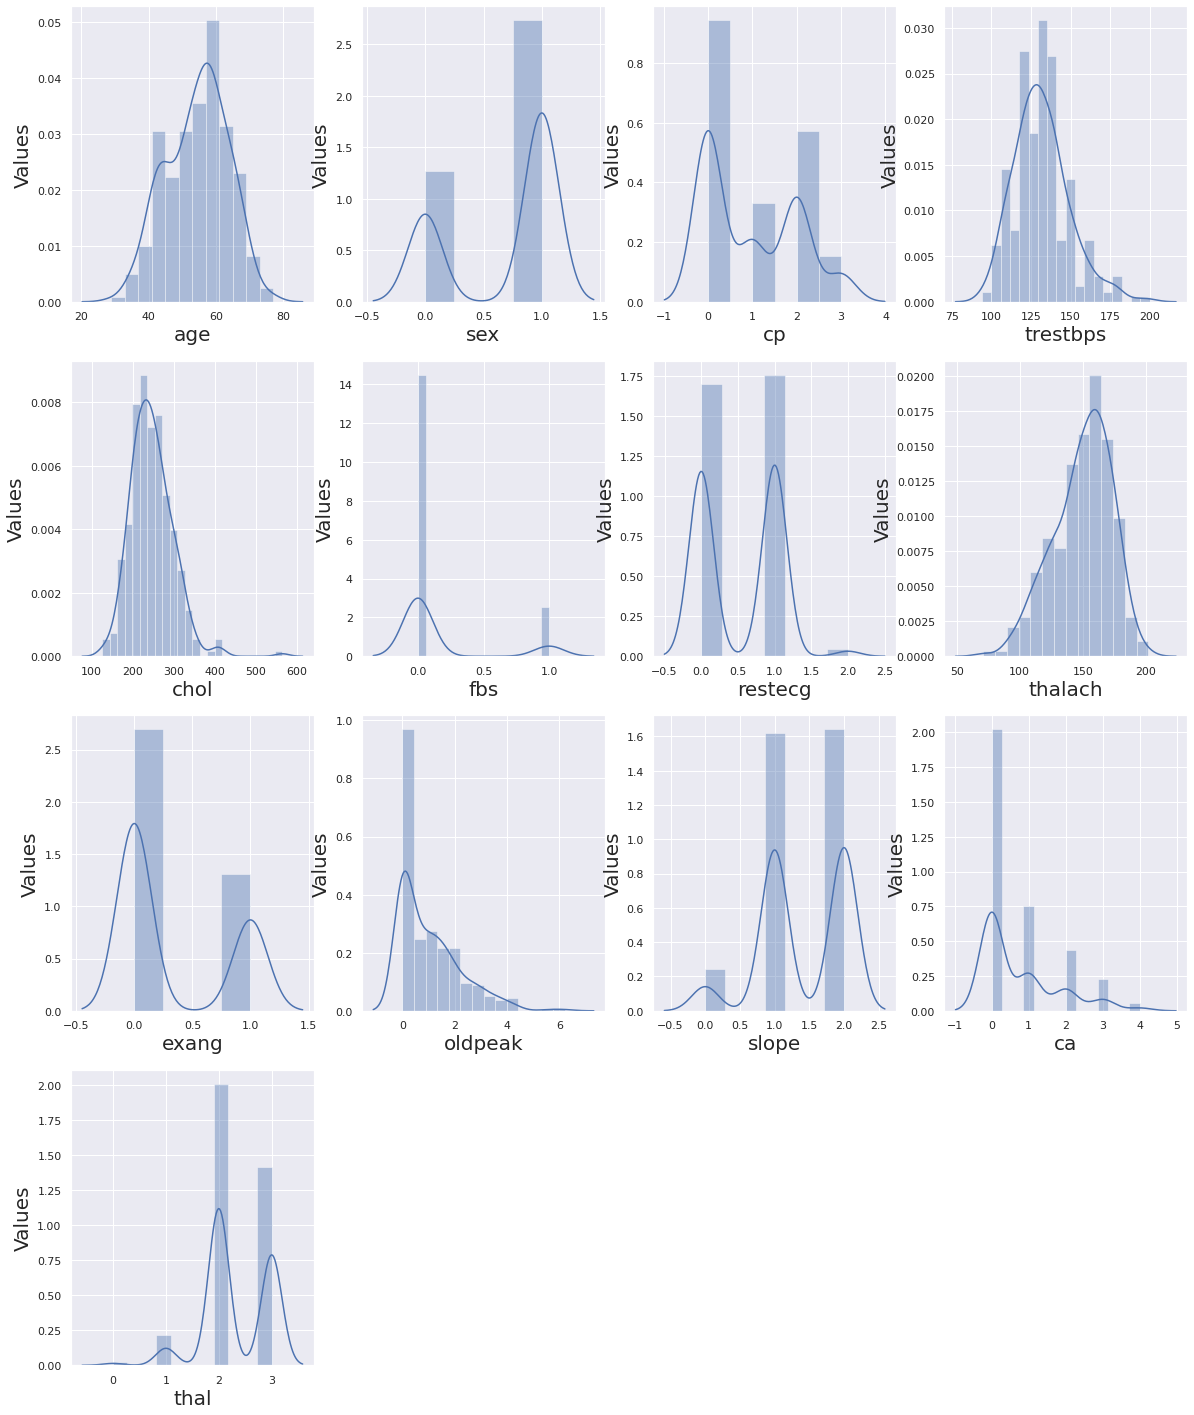

In [128]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
  if plotnumber<14:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(heart_df[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

In [129]:
#checking the variance
heart_df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

#Normalisation

In [130]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

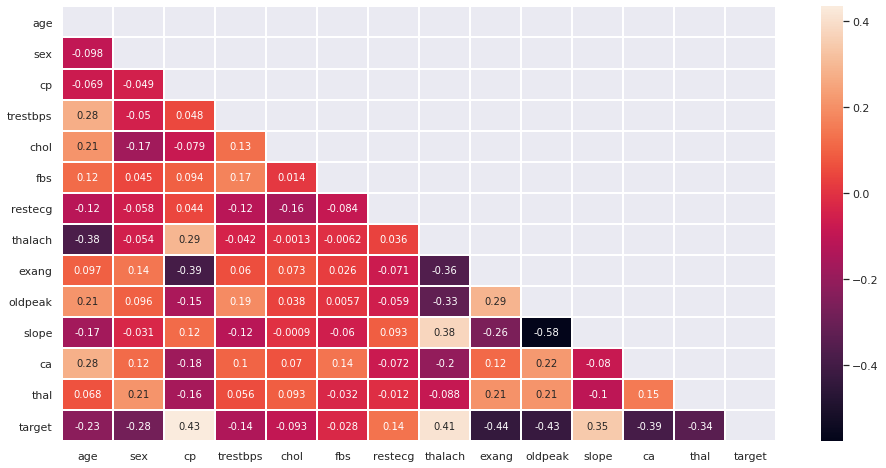

In [131]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [132]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [133]:
x=heart_df.drop('target',axis=1)    
y=heart_df['target']

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)


1.Logistic Regression

In [135]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Accuracy score of the model is: 79.12087912087912 %
Confusion matrix of the model [[33 12]
 [ 7 39]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.76      0.85      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



2.KNearestNeighbors

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))



accuracy_score(y_train,knn.predict(x_train))


Accuracy score of the model is: 73.62637362637363 %
Confusion matrix of the model [[31 14]
 [10 36]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.69      0.72        45
           1       0.72      0.78      0.75        46

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



0.839622641509434

3.SVC

In [137]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVC']=acc2*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))



accuracy_score(y_train,svc.predict(x_train))


Accuracy score of the model is: 60.43956043956044 %
Confusion matrix of the model [[17 28]
 [ 8 38]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.38      0.49        45
           1       0.58      0.83      0.68        46

    accuracy                           0.60        91
   macro avg       0.63      0.60      0.58        91
weighted avg       0.63      0.60      0.58        91



0.6273584905660378

4.DecisionTreeClassifier

In [138]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
accuracies['DecisionTreeClassifier']=acc3*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))



accuracy_score(y_train,dtc.predict(x_train))

Accuracy score of the model is: 74.72527472527473 %
Confusion matrix of the model [[32 13]
 [10 36]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.71      0.74        45
           1       0.73      0.78      0.76        46

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



1.0

In [139]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [140]:
grid_search.best_score_

0.8397563676633444

In [141]:
y_pred4 = dtc.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DecisionTreeClassifier']=acc4*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Accuracy score of the model is: 74.72527472527473 %
Confusion matrix of the model [[32 13]
 [10 36]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.71      0.74        45
           1       0.73      0.78      0.76        46

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



5.RandomForestClassifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)


acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))



accuracy_score(y_train,rfc.predict(x_train))

Accuracy score of the model is: 80.21978021978022 %
Confusion matrix of the model [[33 12]
 [ 6 40]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.77      0.87      0.82        46

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



0.910377358490566

**Boosting**

In [143]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

y_pred5 = xgb.predict(x_test)

acc5=accuracy_score(y_test,y_pred)
accuracies['GradientBoosting']=acc5*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.9s


Accuracy score of the model is: 74.72527472527473 %
Confusion matrix of the model [[26 19]
 [ 4 42]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.58      0.69        45
           1       0.69      0.91      0.79        46

    accuracy                           0.75        91
   macro avg       0.78      0.75      0.74        91
weighted avg       0.78      0.75      0.74        91



[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.1s finished


In [145]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, max_depth = 3, n_estimators = 10)
xgb.fit(x_train, y_train)

y_pred6 = xgb.predict(x_test)

acc6=accuracy_score(y_test,y_pred)
accuracies['XGBClassifier']=acc6*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

print("Confusion matrix of the model",confusion_matrix(y_test,y_pred6))

print("Classification Report",classification_report(y_test,y_pred6))

Accuracy score of the model is: 74.72527472527473 %
Confusion matrix of the model [[26 19]
 [ 4 42]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.58      0.69        45
           1       0.69      0.91      0.79        46

    accuracy                           0.75        91
   macro avg       0.78      0.75      0.74        91
weighted avg       0.78      0.75      0.74        91



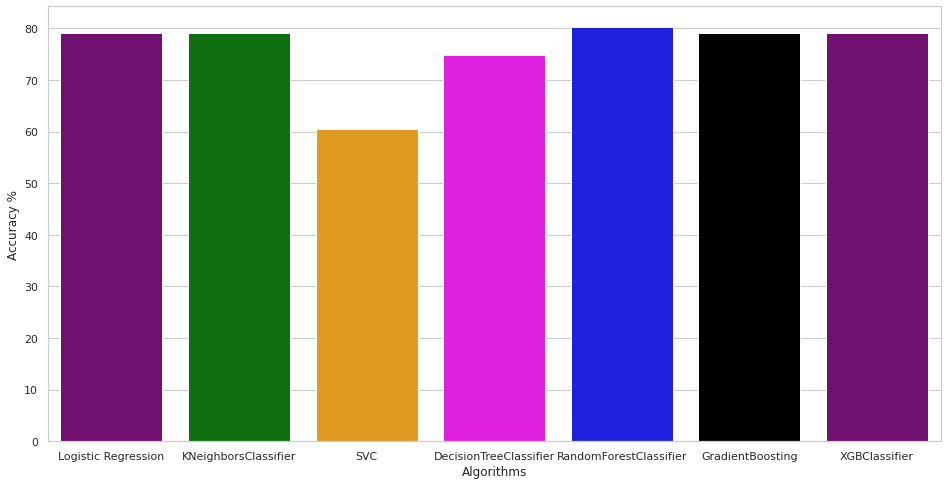

In [146]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()